# TripAdvisor Review NLP Project

## Importing packages, data and checking data integrity

In [14]:
# Standard Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Ingest Data
tripAdvisor_df = pd.read_csv('data/tripadvisor_hotel_reviews.csv')

In [3]:
# View data
tripAdvisor_df

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5
...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5
20487,great location price view hotel great quick pl...,4
20488,"ok just looks nice modern outside, desk staff ...",2
20489,hotel theft ruined vacation hotel opened sept ...,1


In [4]:
# Look at rating stats
tripAdvisor_df.describe()

,Rating
count,20491.000000
mean,3.952223
std,1.233030
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


In [5]:
# Check for nulls
nulls_count = tripAdvisor_df.isnull().sum()
print(nulls_count)

Review    0
Rating    0
dtype: int64


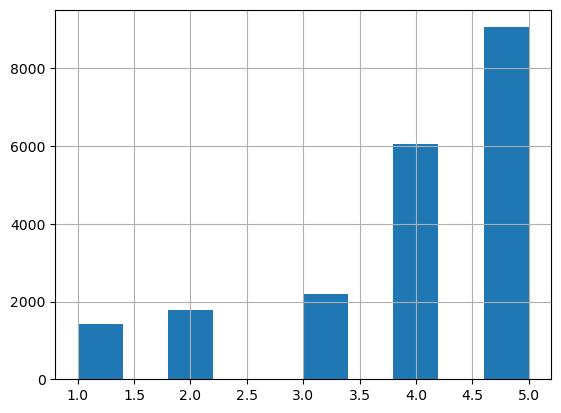

In [7]:
# Look at distribution
tripAdvisor_df['Rating'].hist()
plt.show()

In [8]:
# Check all values are correct
print(tripAdvisor_df['Rating'].unique())

[4 2 3 5 1]


In [9]:
# Check data types
tripAdvisor_df.dtypes

Review    object
Rating     int64
dtype: object

The data is imported and is shaped expected.

## EDA

I've always been curious if the length of a review correlates in any way at all with how good or bad the review is.

In [11]:
# Create data copy for exploration
eda_df = tripAdvisor_df.copy()

# Create new column based off the length of the review
eda_df['review_length'] = eda_df['Review'].str.len()

eda_df

,Review,Rating,review_length
0,nice hotel expensive parking got good deal sta...,4,593
1,ok nothing special charge diamond member hilto...,2,1689
2,nice rooms not 4* experience hotel monaco seat...,3,1427
3,"unique, great stay, wonderful time hotel monac...",5,600
4,"great stay great stay, went seahawk game aweso...",5,1281
...,...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5,733
20487,great location price view hotel great quick pl...,4,306
20488,"ok just looks nice modern outside, desk staff ...",2,443
20489,hotel theft ruined vacation hotel opened sept ...,1,5557


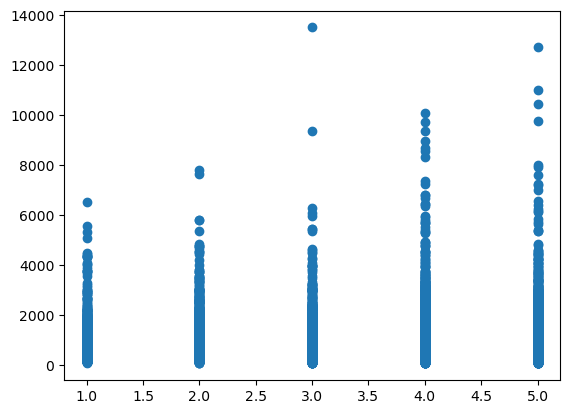

In [13]:
# Create scatter plot to see the shape of the data
plt.scatter(eda_df['Rating'], eda_df['review_length'])
plt.show()

Scatter plot isn't the best for displaying this. A violin plot would be better.

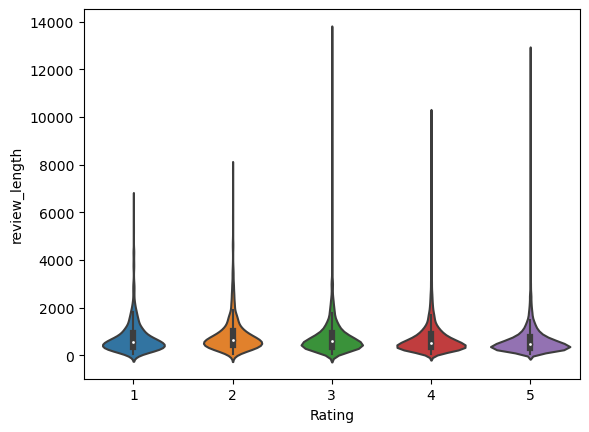

In [15]:
# Seaborn violin plot
sns.violinplot(x="Rating", y="review_length", data=eda_df)

plt.show()

That shows us there might be a coloration, but it also might just be a coincidence that some people get really passionate about certain things. Perhaps averages?

In [16]:
# Mean lengths by rating
mean_lengths = eda_df.groupby('Rating')['review_length'].mean()

print(mean_lengths)

Rating
1    769.534835
2    867.002789
3    784.664835
4    745.339957
5    661.696488
Name: review_length, dtype: float64


It seems like there's a spike in review length of ratings at locations that have a rating of 2 that tapers off the higher the rating goes. This makes sense as people are much more negatively inclined to so will want to vent over a negative review.